In [13]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy import sparse
from   skimage import data

%matplotlib inline

In [2]:
def variation_of_information(x, y):
    # Compute contingency matrix, aka joint prob. matrix
    n = x.size
    Pxy = sparse.coo_matrix(
        (np.full(n , 1 / n), (x.ravel(), y.ravel())),
        dtype=float
    ).tocsrr()
    
    # Compute marginal probs, converting to 1D array
    px = np.ravel(Pxy.sum(axis=1))
    py = np.ravel(Pxy.sum(axis=0))
    
    # Use sparse mat. lin. alg. to compute VI
    # First compute inv. diag. mats.
    Px_inv = sparse.diags(invert_nonzero(px))
    Py_inv = sparse.diags(invert_nonzero(py))
    
    # Then, compute entropies
    hygx = px @ xloglx(Px_inv @ Pxy).sum(axis=1)
    hxgy = xloglx(Pxy @ Py_inv).sum(axis=0) @ py
    
    return float(hygx + hxgy)

In [3]:
pred = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1])
gt   = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # ground truth

In [4]:
def confusion_matrix(pred, gt):
    cont = np.zeros((2, 2))
    for i in [0, 1]:
        for j in [0, 1]:
            cont[i, j] = np.sum((pred == i) & (gt == j))
    return cont

In [5]:
confusion_matrix(pred, gt)

array([[3., 1.],
       [2., 4.]])

### `scipy.sparse` Data Formats
#### `COO` (Coordinate) Format

In [6]:
s = np.array([[5,  0, 3],
              [0, 32, 0]],
             dtype=float)

In [7]:
data = np.array([5, 3, 32])
row = np.array([0, 0, 1])
col = np.array([0, 2, 1])
s_coo = sparse.coo_matrix((data, (row, col)))

In [8]:
s_coo.toarray()

array([[ 5,  0,  3],
       [ 0, 32,  0]])

In [9]:
# shorthand
s_coo.A

array([[ 5,  0,  3],
       [ 0, 32,  0]])

#### `CSR` (Compressed Sparse Row) Format 

Will represent:
```
[[0, 0, 6, 0, 0],
 [1, 2, 0, 4, 5],
 [0, 1, 0, 0, 0],
 [9, 0, 0, 0, 0],
 [0, 0, 0, 6, 7]]
 ```

In [11]:
row = [0, 1, 1, 1, 1, 2, 3, 4, 4]
col = [2, 0, 1, 3, 4, 1, 0, 3, 4]
indptr = [0, 1, 5, 6, 7, 9]

data = np.array([6, 1, 2, 4, 5, 1, 9, 6, 7])
coo = sparse.coo_matrix((data, (row, col)))
csr = sparse.csr_matrix((data, col, indptr))

print(f'coo:\n{coo.A}')
print(f'csr:\n{csr.A}')

coo:
[[0 0 6 0 0]
 [1 2 0 4 5]
 [0 1 0 0 0]
 [9 0 0 0 0]
 [0 0 0 6 7]]
csr:
[[0 0 6 0 0]
 [1 2 0 4 5]
 [0 1 0 0 0]
 [9 0 0 0 0]
 [0 0 0 6 7]]


### Application in image transformation

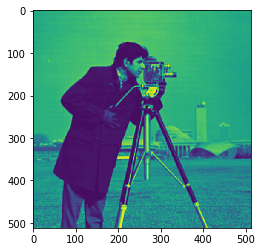

In [15]:
image = data.camera()
plt.imshow(image);